<a href="https://colab.research.google.com/github/aakersh18/book/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/aakersh18/book/refs/heads/main/titanic.csv"
df = pd.read_csv(url)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1.Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Display the output
print(missing_percentage)


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [5]:
# 2.Drop rows with missing values
df_cleaned = df.dropna()


In [8]:
# 3. Summary for numerical columns
numerical_summary = df.describe()
print("Numerical Summary:")
print(numerical_summary)

# Summary for categorical columns
categorical_summary = df.describe(include=['object'])
print("Categorical Summary:")
print(categorical_summary)

Numerical Summary:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
Categorical Summary:
         sex embarked  class  who deck  embark_town alive
count    891      889    891  891  203          889   891
unique     2        3      3    3    7            3     2
top     male        S  Third  man    C  Southampton    no
freq     577      644    4

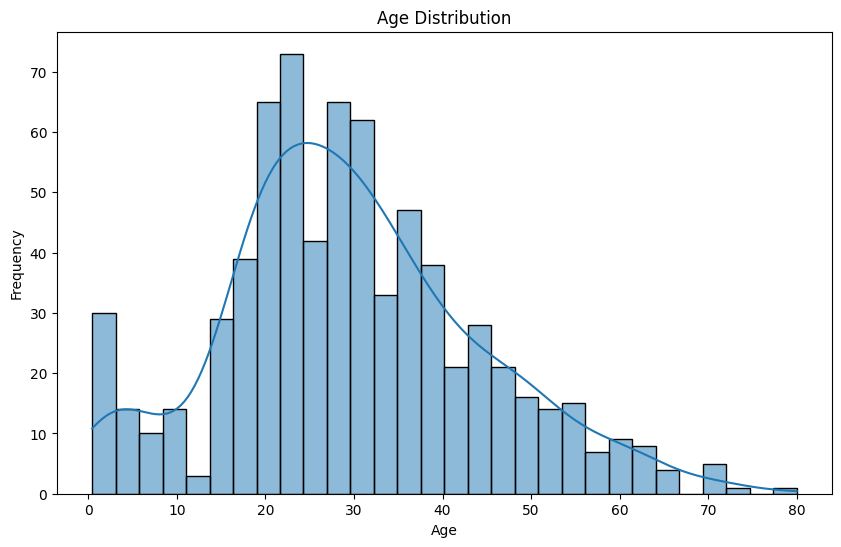

In [12]:
#4. Plot histogram for the age column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

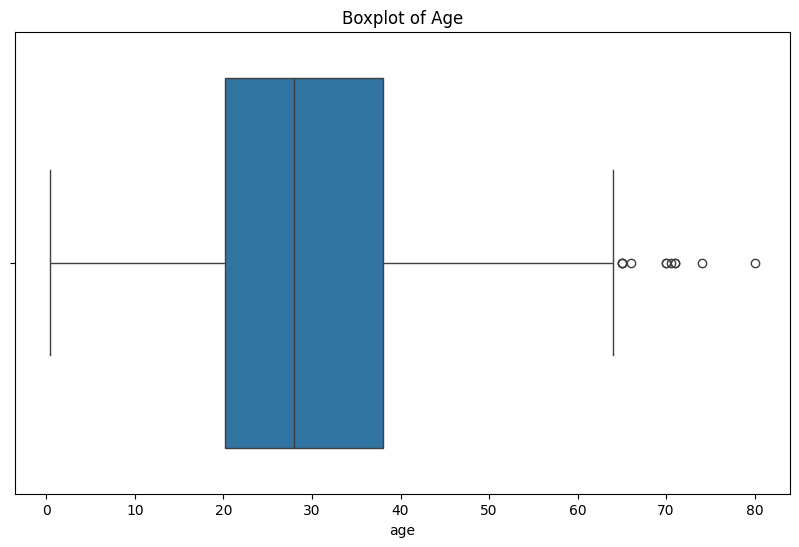

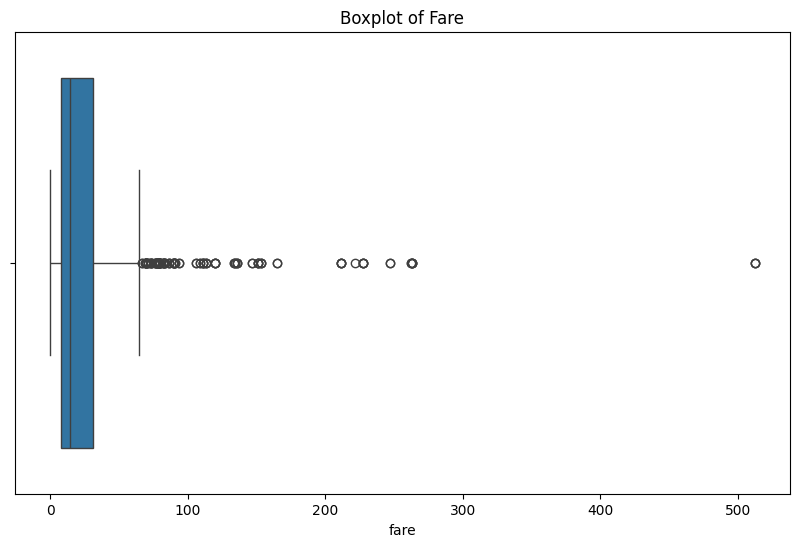

In [13]:
#5. Boxplot for Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Fare
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare'])
plt.title('Boxplot of Fare')
plt.show()

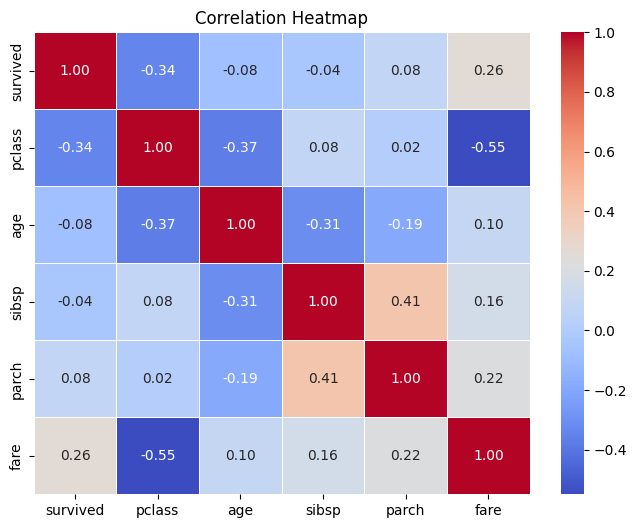

In [15]:
# 6.Calculate and visualize the correlation between numerical columns using a heatmap
numerical_columns = df.select_dtypes(include=[np.number])  # Get numerical columns
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


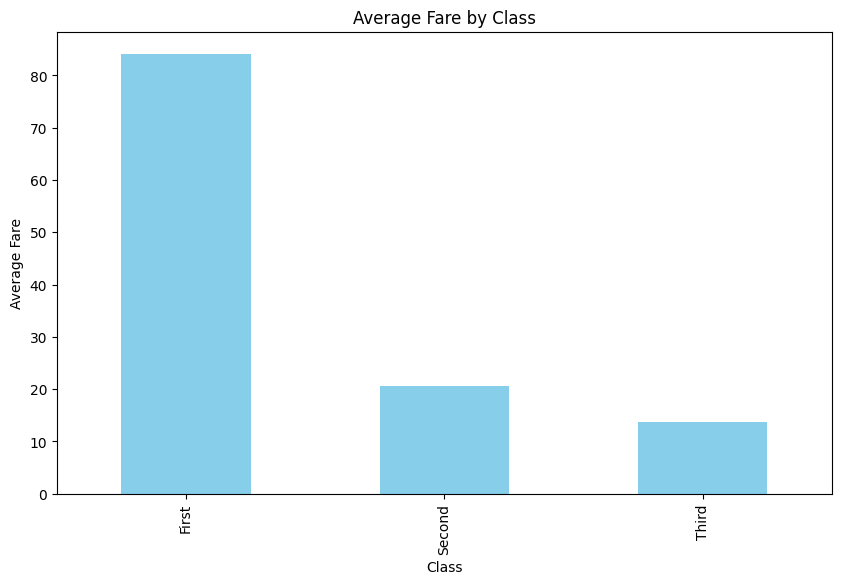

In [16]:
#7. Calculate average fare for each class
average_fare = df.groupby('class')['fare'].mean()
print(average_fare)

# Plot average fare for each class
average_fare.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Fare by Class')
plt.xlabel('Class')
plt.ylabel('Average Fare')
plt.show()

In [26]:
# 7. Average Fare for Each Class
avg_fare_per_class = df.groupby('pclass')['fare'].mean()

# Display average fare for each class
print('Average Fare per Class:')
print(avg_fare_per_class)

Average Fare per Class:
pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


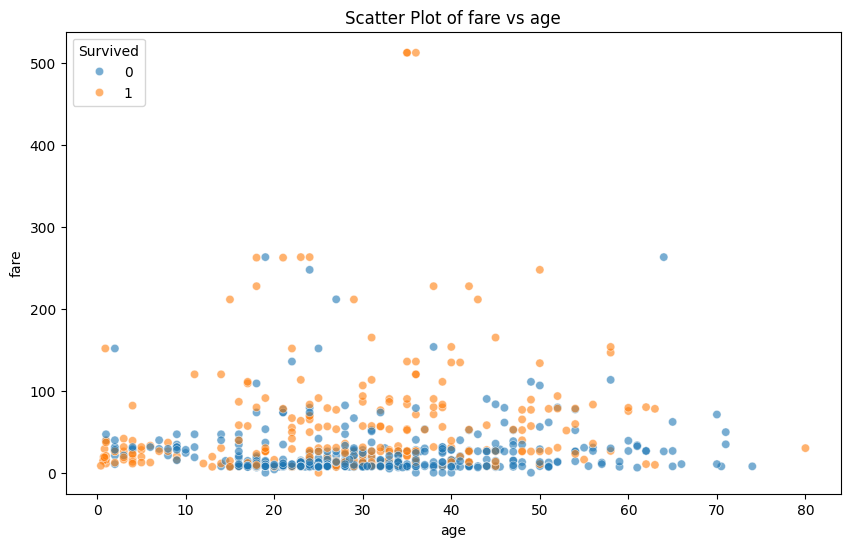

In [27]:
# 8.Scatter plot to visualize the relationship between fare and age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='survived', alpha=0.6)
plt.title('Scatter Plot of fare vs age')
plt.xlabel('age')
plt.ylabel('fare')
plt.legend(title='Survived', loc='upper left')
plt.show()